In [1]:
# import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.shape # checking the dataset size

(1338, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.isnull().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
# for numerical column- null values replacement
df['age'].fillna(df['age'].median(),inplace =True)

In [9]:
# for categorical collumn - null values replacement
df['smoker'].fillna(df['smoker'].mode(),inplace =True)

In [17]:
# Descriptive statistics
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [18]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [19]:
df.region.nunique()

4

In [20]:
df.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [21]:
df.region.value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [22]:
df.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

In [23]:
df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [24]:
df.children.value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [25]:
df.corr()

C:\Users\kuhur\AppData\Local\Temp/ipykernel_33488/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [26]:
df.corr().charges.sort_values(ascending =False)

C:\Users\kuhur\AppData\Local\Temp/ipykernel_33488/3990566358.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr().charges.sort_values(ascending =False)


charges     1.000000
age         0.299008
bmi         0.198341
children    0.067998
Name: charges, dtype: float64

## Visualization

### Univariate Analysis

C:\Users\kuhur\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

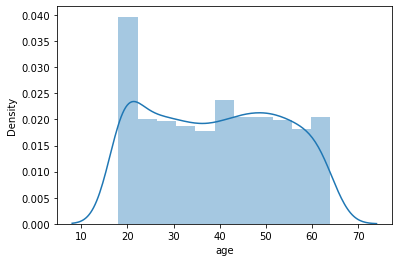

In [27]:
sns.distplot(df.age)

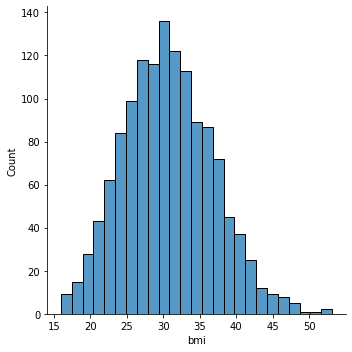

In [28]:
sns.displot(df.bmi)

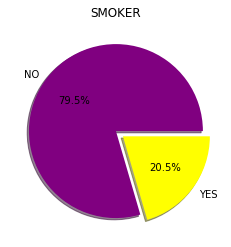

In [29]:
plt.pie(df.smoker.value_counts(),[0,0.1],labels = ['NO','YES'],autopct ='%1.1f%%',shadow = True,colors = ['purple','yellow'],)
plt.title('SMOKER')
plt.show()

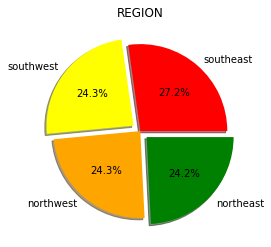

In [30]:
plt.pie(df.region.value_counts(),[0,0.1,0,0.1],labels = ['southeast','southwest','northwest','northeast'],autopct ='%1.1f%%',shadow = True,colors = ['red','yellow','orange','green'],)
plt.title('REGION')
plt.show()

<AxesSubplot:ylabel='region'>

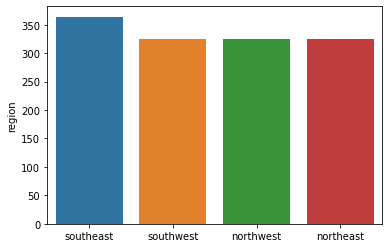

In [31]:
sns.barplot(x =df.region.value_counts().index,y =df.region.value_counts() )

<AxesSubplot:ylabel='sex'>

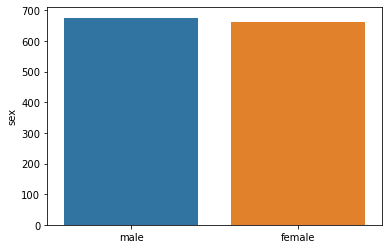

In [32]:
sns.barplot(x =df.sex.value_counts().index,y =df.sex.value_counts() )

### Bivariate Analysis

<AxesSubplot:xlabel='age', ylabel='charges'>

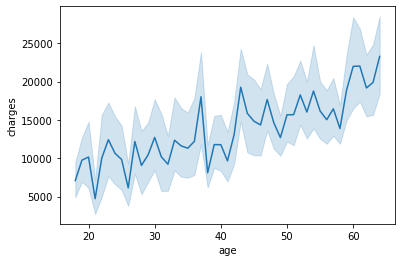

In [33]:
sns.lineplot(x = df.age,y=df.charges)

<AxesSubplot:xlabel='age', ylabel='bmi'>

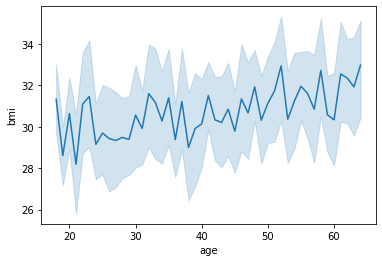

In [34]:
sns.lineplot(x = df.age,y=df.bmi)

<AxesSubplot:xlabel='age', ylabel='charges'>

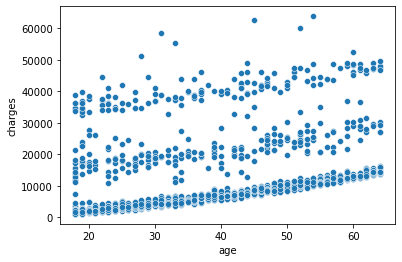

In [35]:
sns.scatterplot(x = df.age,y=df.charges)

### Multivariate Analysis

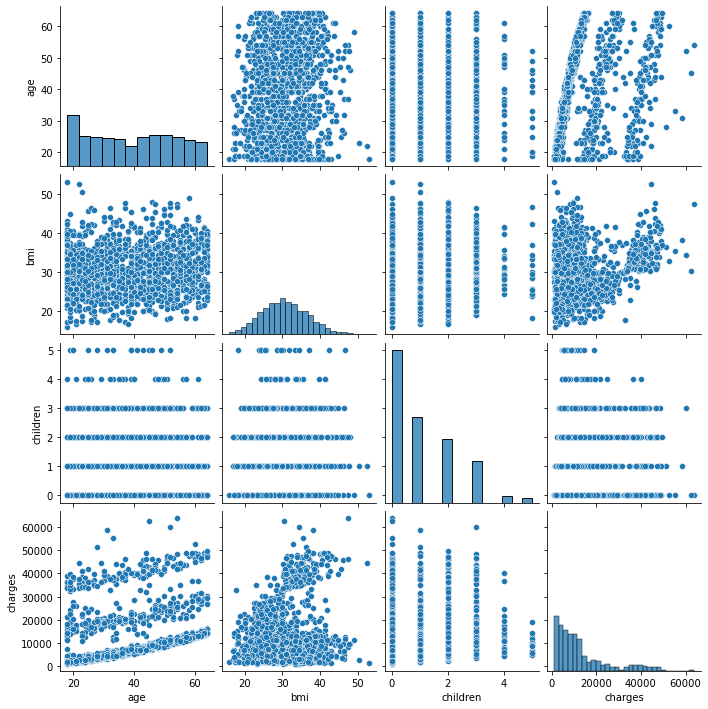

In [36]:
sns.pairplot(df)

C:\Users\kuhur\AppData\Local\Temp/ipykernel_33488/4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<AxesSubplot:>

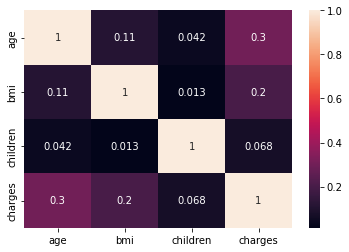

In [37]:
sns.heatmap(df.corr(),annot=True)

## Outlier Detection

In [38]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


C:\Users\kuhur\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bmi'>

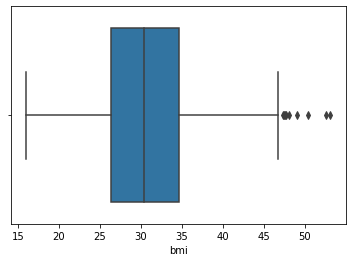

In [39]:
sns.boxplot(df.bmi)

In [40]:
# removal methods- IQR(Inter Quartile Range),Z-score,Percentile method

## Outlier removal by replacement with median

In [41]:
q1 = df.bmi.quantile(0.25) #Q1
q3 = df.bmi.quantile(0.75) #Q3

In [42]:
print(q1)
print(q3)

26.29625
34.69375


In [43]:
IQR = q3-q1

In [44]:
IQR

8.3975

In [45]:
upper_limit = q3+1.5*IQR

In [46]:
upper_limit

47.290000000000006

In [47]:
lower_limit =q1-1.5*IQR

In [48]:
lower_limit

13.7

In [49]:
df.median()

C:\Users\kuhur\AppData\Local\Temp/ipykernel_33488/530051474.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.median()


age           39.000
bmi           30.400
children       1.000
charges     9382.033
dtype: float64

In [50]:
df['bmi'] = np.where(df['bmi']>upper_limit,30,df['bmi'])

C:\Users\kuhur\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bmi'>

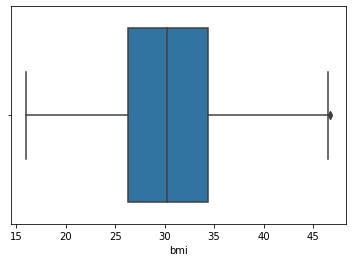

In [51]:
sns.boxplot(df.bmi)

### 1.Outlier removal using IQR

C:\Users\kuhur\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bmi'>

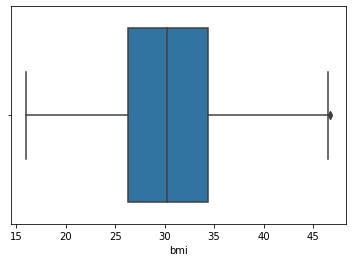

In [52]:
sns.boxplot(df.bmi)

In [53]:
q1 = df.bmi.quantile(0.25) #Q1
q3 = df.bmi.quantile(0.75) #Q3

In [54]:
IQR =q3-q1

In [55]:
upper_limit = q3+1.5*IQR

In [56]:
upper_limit

46.630624999999995

In [57]:
df = df[df.bmi<upper_limit]

C:\Users\kuhur\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bmi'>

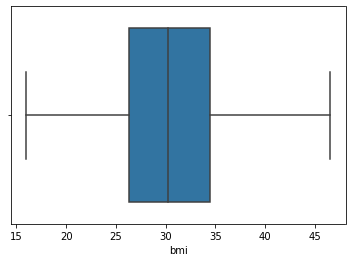

In [58]:
sns.boxplot(df.bmi)

In [59]:
df.shape

(1336, 7)

### 2.  Z-score

C:\Users\kuhur\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bmi'>

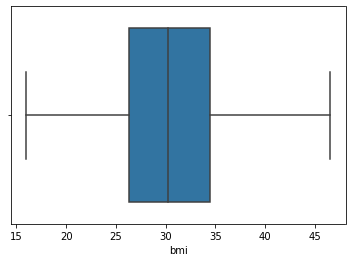

In [60]:
sns.boxplot(df.bmi)

In [61]:
from scipy import stats

In [62]:
bmi_zscore = stats.zscore(df.bmi)
bmi_zscore

0      -0.444626
1       0.555550
2       0.424351
3      -1.329790
4      -0.277646
          ...   
1333    0.078464
1334    0.240333
1335    1.080344
1336   -0.802440
1337   -0.245272
Name: bmi, Length: 1336, dtype: float64

In [63]:
df_z = df[np.abs(bmi_zscore)<=3]

C:\Users\kuhur\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bmi'>

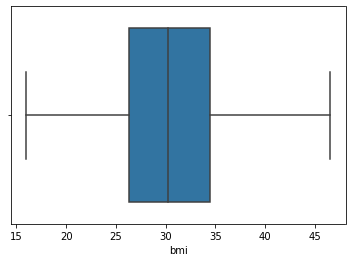

In [64]:
sns.boxplot(df_z.bmi)

In [65]:
df_z.shape

(1336, 7)

### 3.Percentile

C:\Users\kuhur\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bmi'>

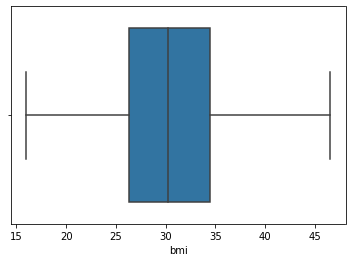

In [66]:
sns.boxplot(df.bmi)

In [67]:
p99 = df.bmi.quantile(0.99)

In [68]:
p99

44.22

In [69]:
df = df[df.bmi<=p99]

C:\Users\kuhur\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bmi'>

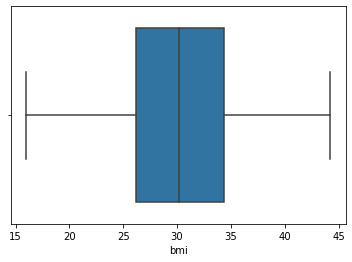

In [70]:
sns.boxplot(df.bmi)

In [71]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### 1.Label Encoding

In [72]:
from sklearn.preprocessing import LabelEncoder

In [73]:
le = LabelEncoder()

In [74]:
df.sex = le.fit_transform(df.sex)
df.smoker = le.fit_transform(df.smoker)

In [75]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


## 2.One-hot Encoding Method

In [76]:
df_main = pd.get_dummies(df,columns =['region'])
df_main.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


In [77]:
df_main.corr()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
age,1.000000,-0.013942,0.117188,0.040390,-0.020770,0.305629,0.001596,0.000047,-0.009971,0.008632
sex,-0.013942,1.000000,0.039752,0.017509,0.075550,0.058542,-0.000306,-0.010876,0.012871,-0.002050
bmi,0.117188,0.039752,1.000000,0.003045,-0.002598,0.195579,-0.128740,-0.116213,0.234314,0.003947
children,0.040390,0.017509,0.003045,1.000000,0.012514,0.073005,-0.018387,0.028124,-0.028736,0.019811
smoker,-0.020770,0.075550,-0.002598,0.012514,1.000000,0.784992,0.003651,-0.037295,0.066448,-0.034730
charges,0.305629,0.058542,0.195579,0.073005,0.784992,1.000000,0.007849,-0.039398,0.070459,-0.040957
region_northeast,0.001596,-0.000306,-0.128740,-0.018387,0.003651,0.007849,1.000000,-0.324323,-0.342849,-0.322338
region_northwest,0.000047,-0.010876,-0.116213,0.028124,-0.037295,-0.039398,-0.324323,1.000000,-0.344253,-0.323659
region_southeast,-0.009971,0.012871,0.234314,-0.028736,0.066448,0.070459,-0.342849,-0.344253,1.000000,-0.342147
region_southwest,0.008632,-0.002050,0.003947,0.019811,-0.034730,-0.040957,-0.322338,-0.323659,-0.342147,1.000000


<AxesSubplot:>

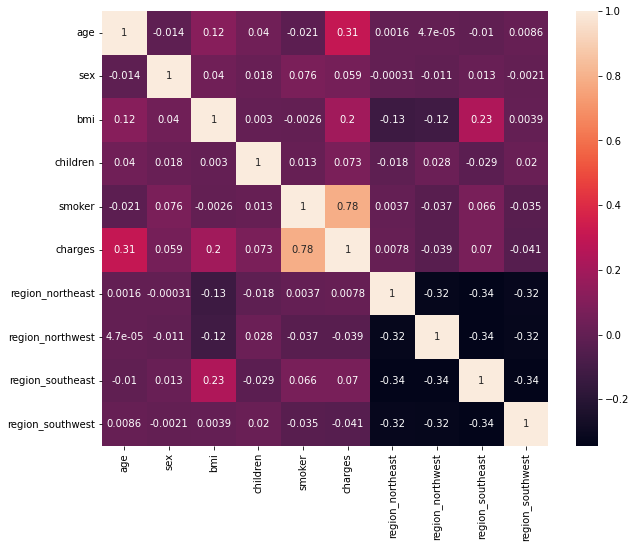

In [78]:
plt.figure(figsize=(10,8))
sns.heatmap(df_main.corr(),annot =True)

In [79]:
df_main.corr().charges.sort_values(ascending=False)

charges             1.000000
smoker              0.784992
age                 0.305629
bmi                 0.195579
children            0.073005
region_southeast    0.070459
sex                 0.058542
region_northeast    0.007849
region_northwest   -0.039398
region_southwest   -0.040957
Name: charges, dtype: float64

In [80]:
df_main.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


## X and y split, independent variable and dependent varaible

In [81]:
y = df_main['charges']
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1323, dtype: float64

In [82]:
X =df_main.drop(columns =['charges'],axis =1)
X.head()

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,0,0,0,1
1,18,1,33.770,1,0,0,0,1,0
2,28,1,33.000,3,0,0,0,1,0
3,33,1,22.705,0,0,0,1,0,0
4,32,1,28.880,0,0,0,1,0,0


### Scaling on independent variables

In [83]:
from sklearn.preprocessing import MinMaxScaler
scale =MinMaxScaler()

In [84]:
X_scaled= pd.DataFrame(scale.fit_transform(X),columns =X.columns)
X_scaled.head()

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,0.021739,0.0,0.422505,0.0,1.0,0.0,0.0,0.0,1.0
1,0.000000,1.0,0.630219,0.2,0.0,0.0,0.0,1.0,0.0
2,0.217391,1.0,0.602972,0.6,0.0,0.0,0.0,1.0,0.0
3,0.326087,1.0,0.238677,0.0,0.0,0.0,1.0,0.0,0.0
4,0.304348,1.0,0.457183,0.0,0.0,0.0,1.0,0.0,0.0


## Train test split

In [85]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.3,random_state=10)

In [86]:
X_train.shape

(926, 9)

In [87]:
X_train.head()

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
1136,0.521739,1.0,0.641897,0.0,0.0,0.0,0.0,0.0,1.0
811,0.586957,1.0,0.627742,0.2,0.0,0.0,0.0,0.0,1.0
378,0.956522,1.0,0.548478,0.2,0.0,0.0,0.0,1.0,0.0
1042,0.195652,0.0,0.194975,0.0,0.0,0.0,1.0,0.0,0.0
828,0.826087,0.0,0.437013,0.0,0.0,1.0,0.0,0.0,0.0


In [88]:
y_train.shape

(926,)

In [89]:
X_test.shape

(397, 9)